### Теория вероятностей и математическая статистика (семинары).
#### Урок 8. Корреляционный анализ.

#### Задача 1.  
Даны значения величины заработной платы заемщиков банка (zp) и значения их
поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy.  
Полученные значения должны быть равны.  
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков,  
а затем с использованием функций из библиотек numpy и pandas.
#### Решение: 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
zp=np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks=np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Построим график, и посмотрим есть ли зависимость между данными?

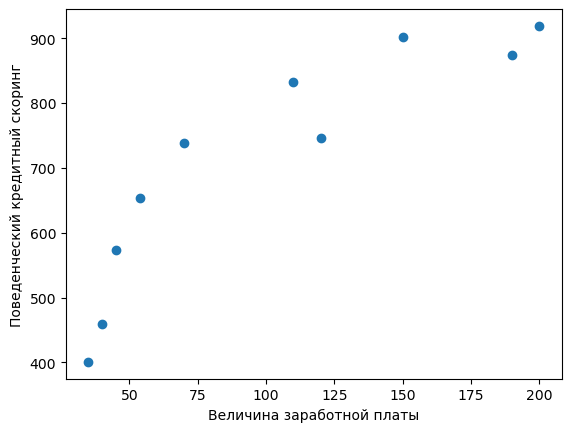

In [12]:
plt.scatter(zp,ks)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

По графику наблюдаем, большим значениям (zp) заработной платы соответствуют большие значения (ks) кредитного скоринга. Из этого следует ожидать, что между этими данными существует выраженная положительная корреляция.  
Найдем коэффициент **ковариации** по формуле:  
$\displaystyle cov_{X,Y}=M(XY)-M(X)\cdot M(Y)$

In [23]:
def covar(array1, array2):
    MXY=sum(array1*array2)/len(array1)
    MX=sum(array1)/len(array1)
    MY=sum(array2)/len(array2)
    return MXY-MX*MY

r=covar(zp,ks)
print(f'Коэффициент ковариации = {r: .4f}')

Коэффициент ковариации =  9157.8400


Воспользуемся функцией cov библиотеки numpy:

In [15]:
np.cov(zp, ks, ddof=0)

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

Коэффициент корреляции Пирсона по формуле:  
$\displaystyle r_{X,Y}=\frac{cov_{X,Y}}{\sigma_X\cdot\sigma_Y}$  
Помним, что для **несмещённой** ковариации берутся **несмещённые** значения среднего квадратического отклонения,  
а для **смещённой**-**смещённые**.

In [24]:
def sigma(array, offset=True):
    mean_array=sum(array)/len(array)
    square_dev=(array-mean_array)**2
    variance=sum(square_dev)/len(array) if offset else sum(square_dev)/(len(array)-1)
    return variance**0.5    

r=covar(zp, ks)/(sigma(zp)*sigma(ks))
print(f'Коэффициент корреляции = {r: .4f}')

Коэффициент корреляции =  0.8875


Воспользуемся функцией corrcoef библиотеки numpy:

In [26]:
r1=np.cov(zp, ks, ddof=1)/(sigma(zp, offset=False)*sigma(ks, offset=False))
print(f'Коэффициент корреляции = {r1}')

Коэффициент корреляции = [[0.33866702 0.88749009]
 [0.88749009 2.95275283]]


Воспользуемся функцией corrcoef библиотеки numpy:

In [29]:
np.corrcoef(zp,ks)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

Воспользуемся функцией corr библиотеки pandas:

In [30]:
df=pd.DataFrame(data={'zp':zp, 'ks':ks})
df

,zp,ks
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


In [31]:
df.corr()

,zp,ks
zp,1.00000,0.88749
ks,0.88749,1.00000


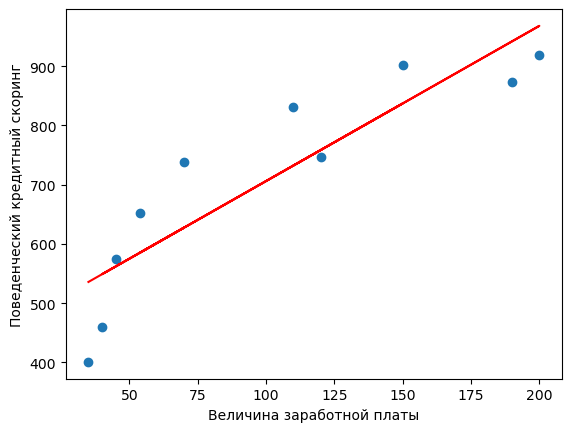

In [13]:
plt.scatter(zp,ks)
plt.plot(zp, 444.18+2.62*zp, c='r')
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

#### Ответ:  
Как и предполагалось из графика, существует сильная линейная взаимосвязь между исходными данными.

#### Задача 2.  
Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:  
131, 125, 115, 122, 131, 115, 107, 99, 125, 111.  
Известно, что в генеральной совокупности IQ распределен нормально.  
Найдите доверительный интервал для математического ожидания с надежностью 0.95.  
#### Решение:  
По условию задачи: мат. ожидании генеральной совокупности **не известно**, о среднем квадратическом отклонении для генеральной совокупности **не известно** => для расчета 95%-го доверительного интервала будем использовать t-критерий и формулу:  
$\bar X\pm t_{\alpha/2}\cdot\frac{\sigma_{несмещ}}{\sqrt{n}}$

In [38]:
arr=np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
print(f'Среднее выборочное: {np.mean(arr): .3f},\n'
      f'Размер выборки n={len(arr)},\n'
      f'Среднее квадратическое отклонение по выборке(несмещенное): {np.std(arr, ddof=1): .3f}.'
     )

Среднее выборочное:  118.100,
Размер выборки n=10,
Среднее квадратическое отклонение по выборке(несмещенное):  10.546.


In [37]:
import scipy.stats as stats
def t_from_table(confidens, len_array):
    alpha=(1-confidens)
    return stats.t.ppf(1-alpha/2, len_array-1)
print(f'Табличное значение t-критерия для 95%-го доверительного интервала данной выборки ={t_from_table(0.95, len(arr)): .3f}')

Табличное значение t-критерия для 95%-го доверительного интервала данной выборки = 2.262


In [46]:
def confidens_int(arr, confidens):
    return round(np.mean(arr)-t_from_table(confidens,len(arr))*np.std(arr, ddof=1)/len(arr)**0.5,3), \
           round(np.mean(arr)+t_from_table(confidens,len(arr))*np.std(arr, ddof=1)/len(arr)**0.5,3)

print(f'Ответ: \n'  
      f'95%-й доверительный интервал для истинного значения IQ = {confidens_int(arr, 0.95)}.')

Ответ: 
95%-й доверительный интервал для истинного значения IQ = (110.556, 125.644).


#### Задача 3.  
Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности,  
равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2.  
Найдите доверительный интервал для математического ожидания с надежностью 0.95.  
#### Решение:  
Поскольку нам известнa дисперсия генеральной совокупности $\sigma^2=25$, то для расчета $95\%$-го доверительного интервала, будем использовать $Z$-критерий. И границы доверительного интервала расчитаем по формуле:  \n",
$\bar X\pm z_{\alpha/2}\cdot\frac{\sqrt{\sigma^2}}{\sqrt n}$, где:  
$\bar X=M=174.2$-среднее значение выборки,  
$z_{\alpha/2}$ табличное значение $Z$-критерия, и для $95\%$-го доверительного интервала $z_{\alpha/2}=1,96$,  
$\sigma^2=25$-дисперсия генеральной совокупности,  
$n=27$-объем выборки 

In [14]:
left=174.2-(1.96*25**0.5)/27**0.5
right=174.2+(1.96*25**0.5)/27**0.5
print(f'Ответ: \n'
    f'95%-й доверительный интервал для оценки мат. ожидания генеральной совокупности:[{left: .4f};{right: .4f}].')

Ответ: 
95%-й доверительный интервал для оценки мат. ожидания генеральной совокупности:[ 172.3140; 176.0860].
